# BA880: People Analytics
# Team Project - Employees With What Characteristics Should Be Promoted.
**Team Juicy:**
* Fusu Luo
* Yipeng (Caroline) Guo
* Yilun (Allen) Wang

***

**Dataset:** 
    HR Perspective: Job Promotion
    
 (*Data source from Kaggle: https://www.kaggle.com/shivan118/hranalysis*)

  The dataset is compromised by Kaggle, and categorized as public domain for learning use.


**Background:**
    This company  is active in its area. Every year, around 5% of its employees have been promoted in the company. The HR department is wondering that employees with which characteristics should be promoted. Or, what kind of employees have higher possibility of being promoted.

**Objective:**
    The project goal is to predict whether an employee could be promoted using his/her specific performance with characteristics; Which helps minimize HR department's cost and improve efficiencies. Also, include employees worthy of promotion into HR's field of vision. 
    
  By using both descriptive and predictive analysis on a company’s HR dataset, we seek to interpret affecting factors on employees' promotion possibilities. 

# Summary of the Dataset

To explore the factors that influence the employee decision, we chose to narrow the features of our dataset to the following 13 variables:

48,660 rows and 14 features

- employee_id
- department
- region
- education
- gender
- recruitment_channel
- nooftrainings
- age 
- previous year rating
- lengthofservice
- KPIs_met >80%
- awards_won?
- avgtrainingscore

Also, our target feature is ***is_promoted***, whether the employee has been promoted or not.


Data preparationg for ML 

To get dummies:
* gender->0,1, 
* experience->0~21, 
* relevent_experience: 0,1 binary 
* enrolled_university: get dummy, 3 columns
* education_level: get dummy, 3 columns
* major_discipline: 0,1 STEM, NOT STEM
* company_size: small, large, medium, unknown 
* company_type: Unknown, startupGroup, Private, public, NGO, other
* lastnewjob-> turn into integer: 0,1,2,3,4,5; 

# 1. Data Cleaning and Processing

## 1.1 Null Value Cleaning

In [ ]:
!pip install squarify

In [ ]:
!pip install circlify

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import squarify

In [ ]:
# Importing Data
df = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/HR-Romotion/main/hr.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
# Check how many entries do we have
df.shape

(54808, 14)

In [ ]:
# check NULL values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# Drop NA
df.dropna(inplace = True)

In [ ]:
# Set palette and target
target = 'is_promoted'
col1 = sns.color_palette("Set2")
col2 = ['#ff6969', '#69ff8e'] # Used when we consider the graphs in relation to the target variable. Red - not promoted, Green - promoted

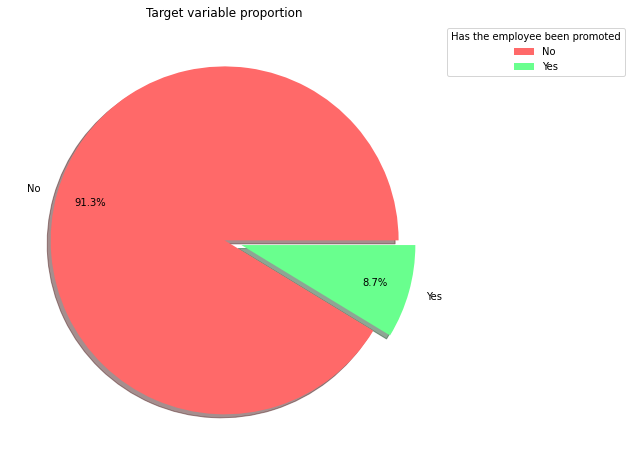

In [ ]:
# Plot the distribution of target to check whether this data is balanced.

sizes = [df.query(f'{target} == 0').shape[0],
         df.query(f'{target} == 1').shape[0]]

plt.figure(figsize=(12, 8))
plt.title('Target variable proportion')
plt.pie(sizes, labels=['No', 'Yes'], colors = col2, autopct="%.1f%%", pctdistance=0.8, explode=[0,0.1], shadow=True)
plt.legend(title='Has the employee been promoted', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))
plt.show()

As we can easily tell from this graph, this dataset is indeed unbalanced. Among all the 48k employees, only 8.7% of them has been promoted. We should keep this in mind in the following analysis.

## 1.2 Data Processing For Machine & Deep Learning Model



In [ ]:
# Create a copy for ML models
ml = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/HR-Romotion/main/hr.csv')
ml.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
# Drop NA
ml.dropna(inplace = True)

In [ ]:
# check for unique input of our dataset - department
(ml['department'].unique())

# Give a scale
find_replace_dep = {"department":{"Sales & Marketing": 0, "Operations": 1, "Technology": 2, "Analytics": 3, "R&D": 4, "Procurement": 5,
                                  "Finance": 6, "HR": 7, "Legal": 8}}
ml.replace(find_replace_dep, inplace=True)
ml.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,1,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,0,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [ ]:
# check for unique input of our dataset - region
(ml['region'].unique())

# Give a scale
find_replace_region = {"region":{"region_1": 1, "region_2": 2, "region_3": 3, "region_4": 4, "region_5": 5, "region_6": 6,
                                  "region_7": 7, "region_8": 8, "region_9": 9, "region_10": 10, "region_11": 11, "region_12": 12,
                                  "region_13": 13, "region_14": 14, "region_15": 15, "region_16": 16, "region_17": 17, "region_18": 18,
                                  "region_19": 19,"region_20": 20, "region_21": 21, "region_22": 22, "region_23": 23, "region_24": 24,
                                  "region_25": 25, "region_26": 26, "region_27": 27, "region_28": 28, "region_29": 29, "region_30": 30,
                                  "region_31": 31, "region_32": 32, "region_33": 33, "region_34": 34}}
ml.replace(find_replace_region, inplace=True)
ml.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,1,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,0,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [ ]:
# check for unique input of our dataset - education
(ml['education'].unique())

# Give a scale
find_replace_edu = {"education":{"Below Secondary": 0, "Bachelor's": 1, "Master's & above": 2}}
ml.replace(find_replace_edu, inplace=True)
ml.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0,7,2,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,1,22,1,m,other,1,30,5.0,4,0,0,60,0
2,7513,0,19,1,m,sourcing,1,34,3.0,7,0,0,50,0


In [ ]:
# check for unique input of our dataset - gendel
(ml['gender'].unique())

# Give a scale
find_replace_gen = {"gender":{"m": 0, "f": 1}}
ml.replace(find_replace_gen, inplace=True)
ml.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0,7,2,1,sourcing,1,35,5.0,8,1,0,49,0
1,65141,1,22,1,0,other,1,30,5.0,4,0,0,60,0
2,7513,0,19,1,0,sourcing,1,34,3.0,7,0,0,50,0


In [ ]:
# check for unique input of our dataset - gendel
(ml['recruitment_channel'].unique())

# Give a scale
find_replace_source = {"recruitment_channel":{"sourcing": 0, "referred": 1, "other": 2}}
ml.replace(find_replace_source, inplace=True)
ml.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0,7,2,1,0,1,35,5.0,8,1,0,49,0
1,65141,1,22,1,0,2,1,30,5.0,4,0,0,60,0
2,7513,0,19,1,0,0,1,34,3.0,7,0,0,50,0


In [ ]:
# Check types - Great!
ml.dtypes

employee_id               int64
department                int64
region                    int64
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

# 2. Exploratory Data Analysis 



## 1. Basic Information
    1. Gender
    2. AGE
    3. Department
    4. Education (below secondary, bachelor's, master's & above)
    5. Region (1-34)
    6. Recruitment_channel (sourcing, referred, other

### 1.1 Gender 

Is the company gender biased? What is the impact of gender on promotion?

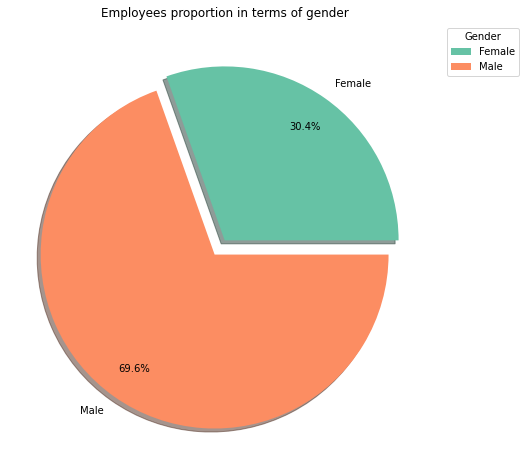

In [ ]:
sizes = [df.loc[df['gender'] == 'f'].shape[0],
         df.loc[df['gender'] == 'm'].shape[0]]

plt.figure(figsize=(12, 8))
plt.title('Employees proportion in terms of gender')
plt.pie(sizes, labels=['Female', 'Male'], autopct="%.1f%%", pctdistance=0.8, explode=[0,0.1], shadow=True, colors=col1)
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.show()

Approximately 70% of the employees are male, demonstrating a bias in the hiring at this company. And this also may indicates a bias in promotion.

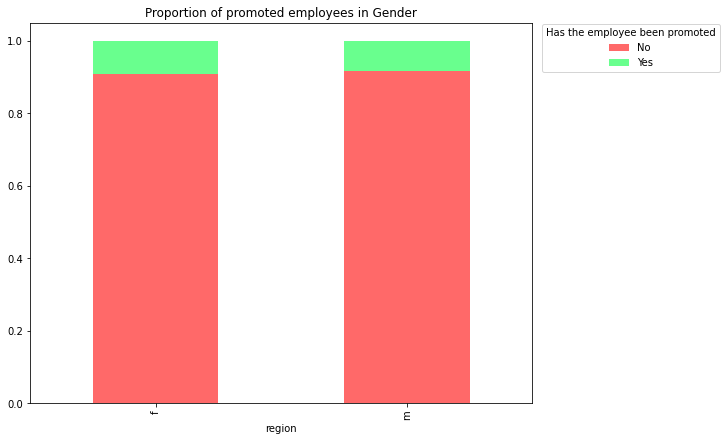

In [ ]:
data = pd.crosstab(df['gender'], df['is_promoted'])
ax = data.div(data.sum(1).astype('float'), 
              axis = 0
             ).sort_values(by=0).plot(kind = 'bar', stacked = True, figsize = (9, 7), color=col2)

plt.title('Proportion of promoted employees in Gender')
plt.xlabel('region')
plt.legend(title='Has the employee been promoted', bbox_to_anchor=(1.01, 1.01), labels=['No', 'Yes'])
plt.show()

It turns out that the promotion rates among group of male and female are almost the same. Although male get a bit more promotion possibility, it is quite **fair** in reality. That is, gender has very little or no impact on the decision of promotion.

### 1.2 Age 

What is the impact of age on promotion? Do they prefer younger or older?

In [ ]:
def custom_displot(df: pd.DataFrame, col: str) -> None:
    rp = sns.displot(data=df, x=col, hue=target, palette=col2, kde=True, height=6, aspect=3)
    rp._legend.remove()
    plt.legend(title=f'Has the employee been promoted', loc='upper right', labels=['Yes', 'No'])
    rp.fig.suptitle(f'{col} distribution')

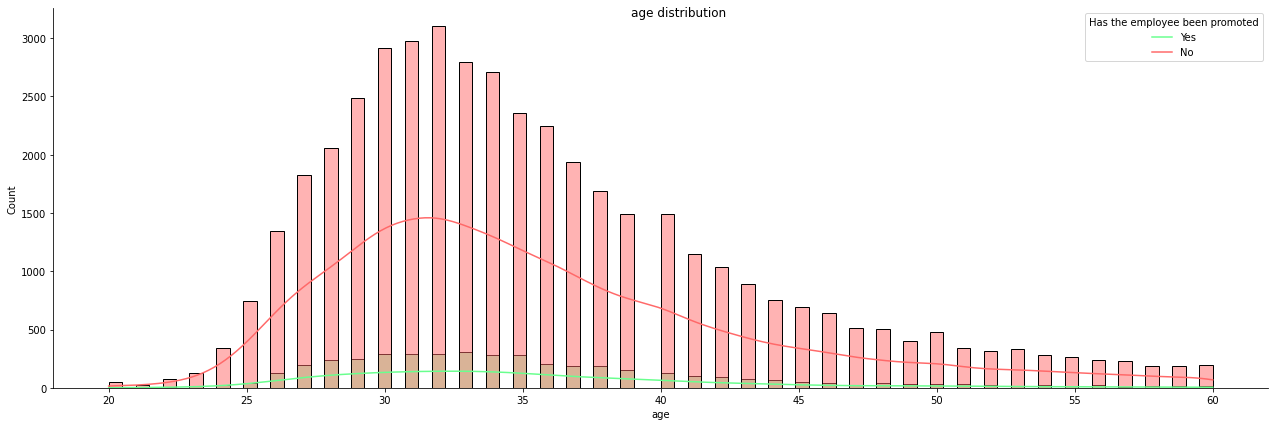

In [ ]:
custom_displot(df, 'age')

In [ ]:
def custom_boxplot(df: pd.DataFrame, col: str) -> None:
    plt.figure(figsize=(10,6))
    plt.title(f'{col} boxplot with target variable')
    ax = sns.boxplot(data=df, x=target, y=col, palette=col2)
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_xlabel('Has the employee ben promoted')
    plt.show()

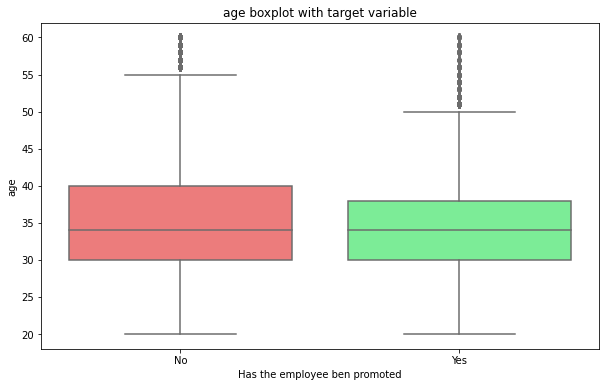

In [ ]:
custom_boxplot(df, 'age')

According to our plots, whether get promoted or not, the distribution of age shows no difference. Therefore we can say that we can't see the significance of age impact.

### 1.3 Department 

Do the company focuses on some department and give promotion to employees in it?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


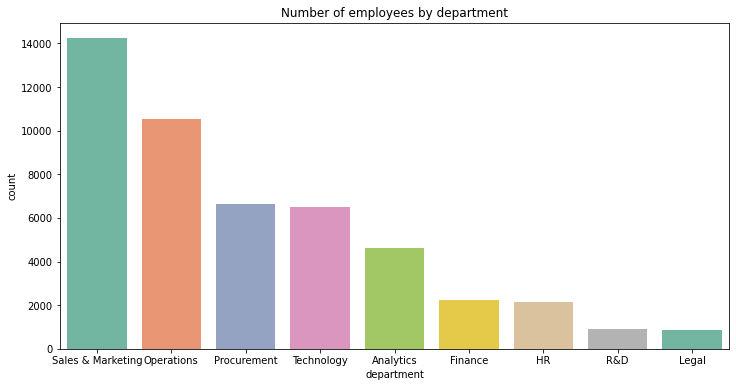

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Number of employees by department')
ax = sns.countplot(df['department'], order = df['department'].value_counts().index, palette=col1)
plt.show()

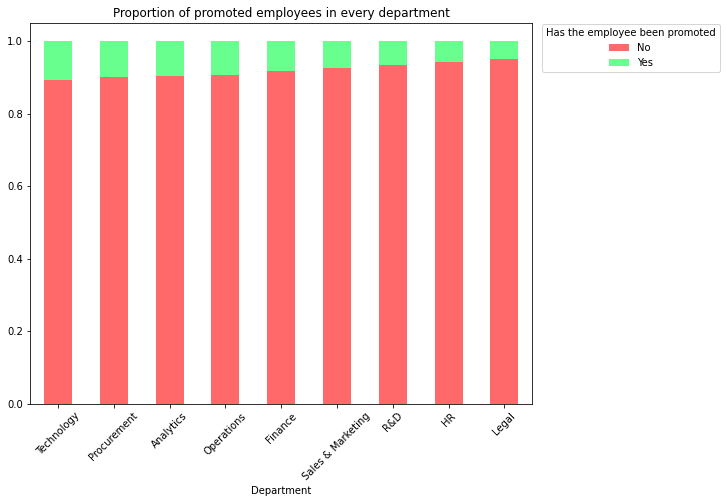

In [ ]:
data = pd.crosstab(df['department'], df['is_promoted'])
ax = data.div(data.sum(1).astype('float'), 
              axis = 0
             ).sort_values(by=0).plot(kind = 'bar', stacked = True, figsize = (9, 7), color=col2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.title('Proportion of promoted employees in every department')
plt.xlabel('Department')
plt.legend(title='Has the employee been promoted', bbox_to_anchor=(1.01, 1.01), labels=['No', 'Yes'])
plt.show()

According to our distribution and possibillity plot against department, there indeed exist a trend of promoting employees in **technology, procurement and analytics**. 

### 1.4 Education 

Do the company tends to promote employees with higher education level?

In [ ]:
# import the circlify library
import circlify
values_e = df["education"].value_counts().sort_values(ascending=False)
labels_e = df["education"].value_counts().sort_values(ascending=True).index
# compute circle positions:
circles = circlify.circlify(
    values_e.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

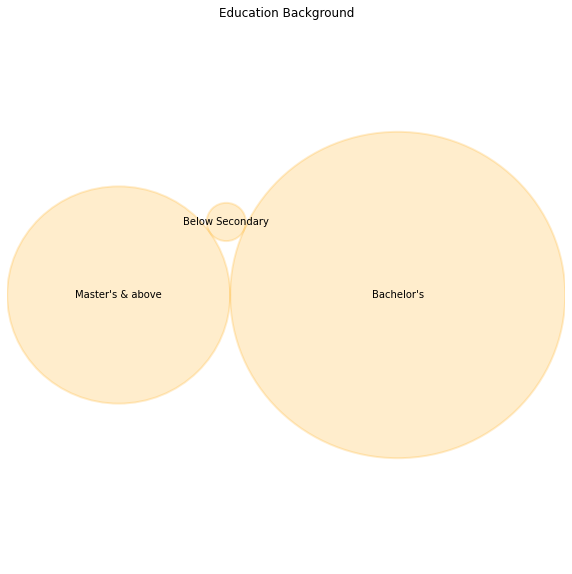

In [ ]:
# circular packing
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Education Background')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = labels_e

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, color="orange", linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )


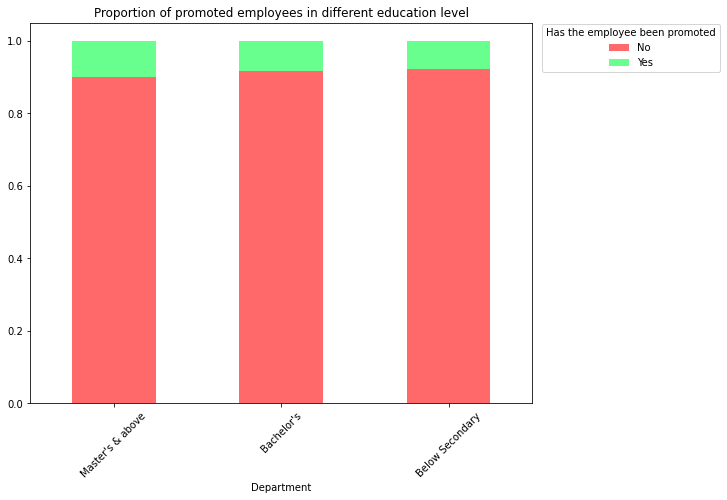

In [ ]:
data = pd.crosstab(df['education'], df['is_promoted'])
ax = data.div(data.sum(1).astype('float'), 
              axis = 0
             ).sort_values(by=0).plot(kind = 'bar', stacked = True, figsize = (9, 7), color=col2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.title('Proportion of promoted employees in different education level')
plt.xlabel('Department')
plt.legend(title='Has the employee been promoted', bbox_to_anchor=(1.01, 1.01), labels=['No', 'Yes'])
plt.show()

Speaking of education level, initially, there are only very few employees are on the level of below secondary. For others, we can see a tiny trend of lean to people with Master's or higher degree.

### 1.5 Region 

Do the company tends to promote employees in some specific regions?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


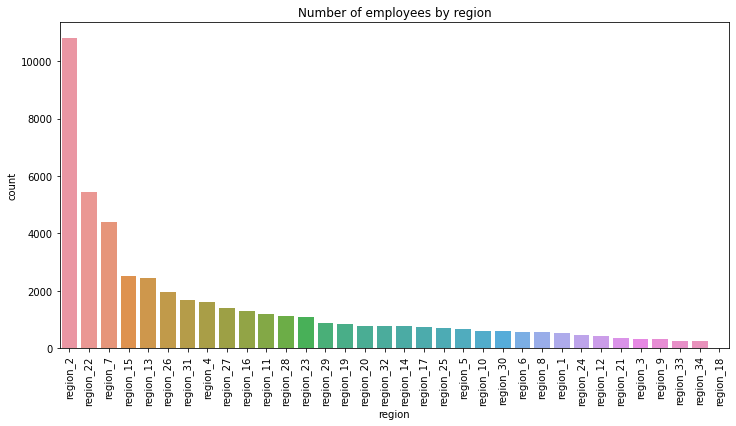

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Number of employees by region')
ax = sns.countplot(df['region'], order = df['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

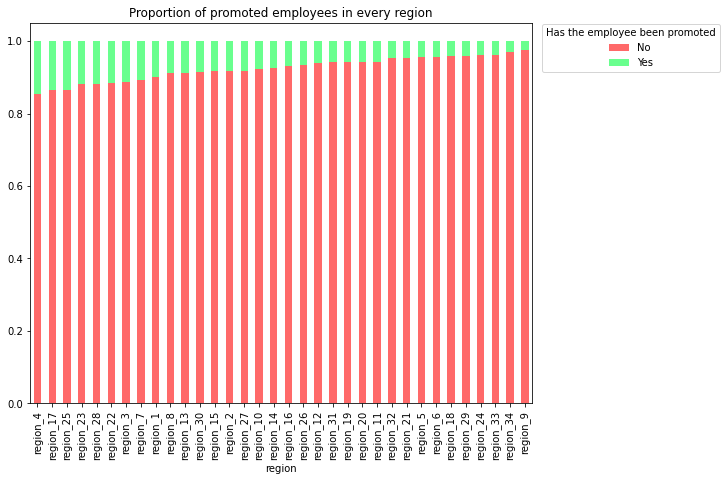

In [ ]:
data = pd.crosstab(df['region'], df['is_promoted'])
ax = data.div(data.sum(1).astype('float'), 
              axis = 0
             ).sort_values(by=0).plot(kind = 'bar', stacked = True, figsize = (9, 7), color=col2)

plt.title('Proportion of promoted employees in every region')
plt.xlabel('region')
plt.legend(title='Has the employee been promoted', bbox_to_anchor=(1.01, 1.01), labels=['No', 'Yes'])
plt.show()

Indeed, the company tend to select promoted employees from some specific regions; It shows a clear distinguish between 34 districts.

### 1.6 Recruitment Channel

Do the company has preference of employees referred or sourced?

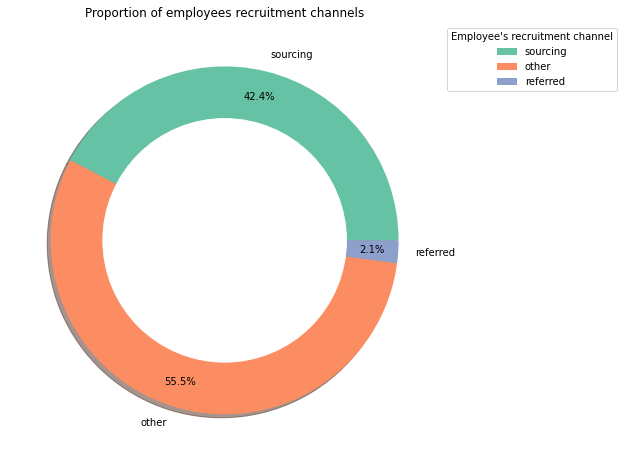

In [ ]:
unique_column_labels = df['recruitment_channel'].dropna().unique()
sizes = []

for i, label in enumerate(unique_column_labels):
    sizes.append(df.loc[df['recruitment_channel'] == label].shape[0])

plt.figure(figsize=(14, 8))
plt.title("Proportion of employees recruitment channels")
plt.pie(sizes, labels=unique_column_labels, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=col1)
plt.legend(title="Employee's recruitment channel", labels=unique_column_labels, bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

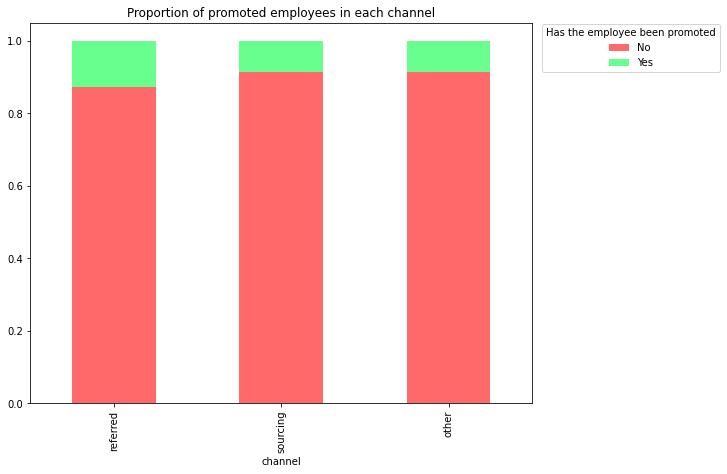

In [ ]:
data = pd.crosstab(df['recruitment_channel'], df['is_promoted'])
ax = data.div(data.sum(1).astype('float'), 
              axis = 0
             ).sort_values(by=0).plot(kind = 'bar', stacked = True, figsize = (9, 7), color=col2)

plt.title('Proportion of promoted employees in each channel')
plt.xlabel('channel')
plt.legend(title='Has the employee been promoted', bbox_to_anchor=(1.01, 1.01), labels=['No', 'Yes'])
plt.show()

There is a distinguish between employees with referral and others.

## 2. Performance
    1. Previous year rating
    2. KPIs met > 80%
    3. Award won
    4. Average training score
    5. Length of service

### 2.1 Previous year rating

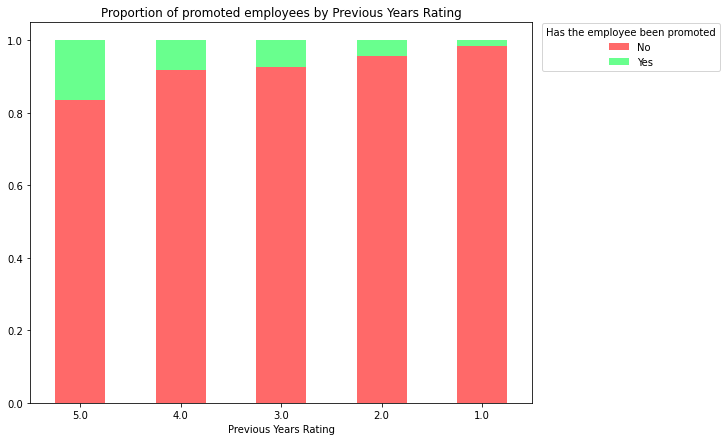

In [ ]:
data = pd.crosstab(df['previous_year_rating'], df[target])
ax = data.div(data.sum(1).astype('float'), 
              axis = 0
             ).sort_values(by=0).plot(kind = 'bar', stacked = True, figsize = (9, 7), color=col2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.title('Proportion of promoted employees by Previous Years Rating')
plt.xlabel('Previous Years Rating')
plt.legend(title='Has the employee been promoted', bbox_to_anchor=(1.01, 1.01), labels=['No', 'Yes'])
plt.show()

There is some dependency: the higher previous_year_rating -> more likely employees are getting promoted.

### 2.2 KPIs met > 80%

Whether this company has a taste of employees with higher KPIs?

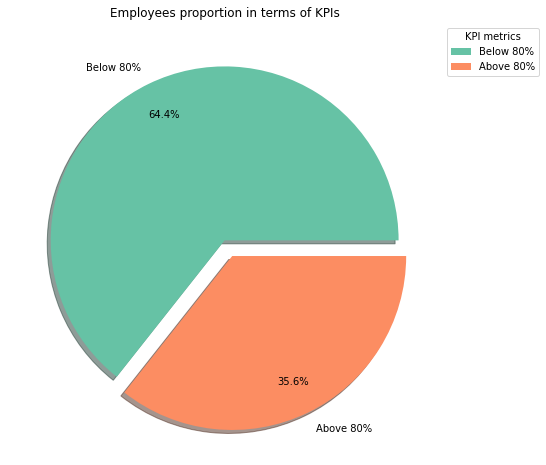

In [ ]:
sizes = [df.loc[df['KPIs_met >80%'] == 0].shape[0],
         df.loc[df['KPIs_met >80%'] == 1].shape[0]]

plt.figure(figsize=(14, 8))
plt.title('Employees proportion in terms of KPIs')
plt.pie(sizes, labels=['Below 80%', 'Above 80%'], autopct="%.1f%%", pctdistance=0.8, explode=[0,0.1], shadow=True, colors=col1)
plt.legend(title='KPI metrics', bbox_to_anchor=(1, 1))
plt.show()

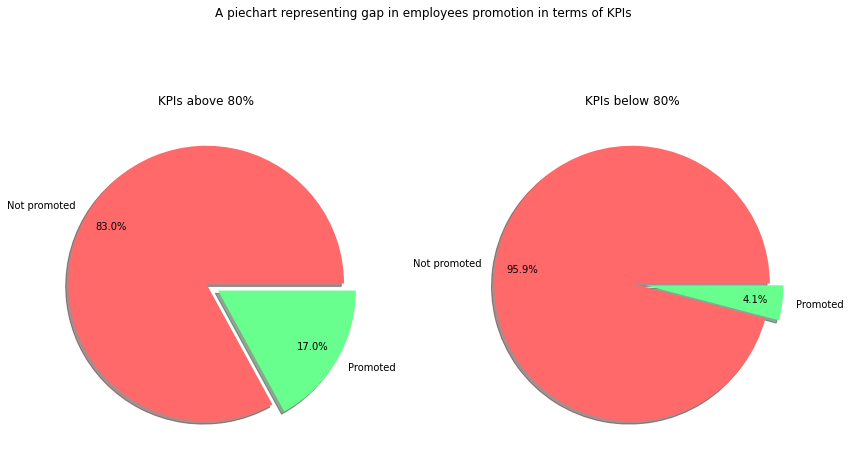

In [ ]:
unique_column_labels = df['KPIs_met >80%'].dropna().unique()
titles = ['KPIs above 80%', 'KPIs below 80%']
unique_target_labels = ['Not promoted', 'Promoted']

fig, axes= plt.subplots(1, len(unique_column_labels), figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    sizes = [df.loc[df['KPIs_met >80%'] == unique_column_labels[i]].query(f'{target} == 0').shape[0],
             df.loc[df['KPIs_met >80%'] == unique_column_labels[i]].query(f'{target} == 1').shape[0]]
    ax.pie(sizes, labels=unique_target_labels, colors=col2, autopct="%.1f%%", pctdistance=0.8, explode=[0,0.1], shadow=True)
    ax.set_title(titles[i])

fig.suptitle('A piechart representing gap in employees promotion in terms of KPIs')

plt.tight_layout()
plt.show()

Speaking of KPIs' distribution, about 65% employees did not meet the 80% requirement. What's more, the promotion system shows a clear preference of promoting among employees with KPIs higher that 80%.

### 2.3 Award won

Whether the company has a taste of employees won awards?

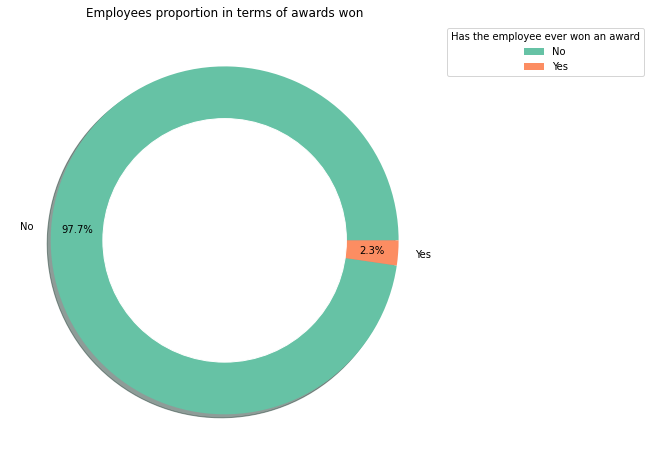

In [ ]:
sizes = [df.loc[df['awards_won?'] == 0].shape[0],
         df.loc[df['awards_won?'] == 1].shape[0]]

plt.figure(figsize=(14, 8))
plt.title('Employees proportion in terms of awards won')
plt.pie(sizes, labels=['No', 'Yes'], colors=col1, autopct="%.1f%%", pctdistance=0.85, shadow=True)

plt.legend(title='Has the employee ever won an award', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

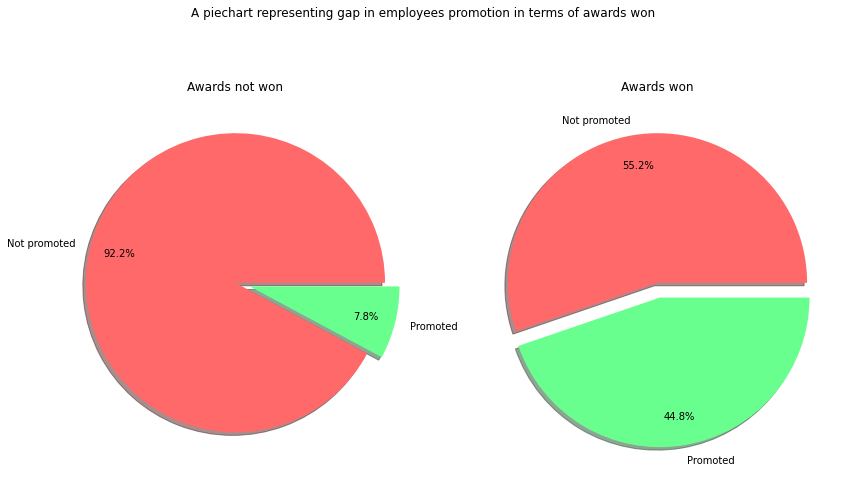

In [ ]:
unique_column_labels = df['awards_won?'].dropna().unique()
titles = ['Awards not won', 'Awards won']
unique_target_labels = ['Not promoted', 'Promoted']

fig, axes= plt.subplots(1, len(unique_column_labels), figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    sizes = [df.loc[df['awards_won?'] == unique_column_labels[i]].query(f'{target} == 0').shape[0],
             df.loc[df['awards_won?'] == unique_column_labels[i]].query(f'{target} == 1').shape[0]]
    ax.pie(sizes, labels=unique_target_labels, colors=col2, autopct="%.1f%%", pctdistance=0.8, explode=[0,0.1], shadow=True)
    ax.set_title(titles[i])

fig.suptitle('A piechart representing gap in employees promotion in terms of awards won')

plt.tight_layout()
plt.show()

Although there are only 2.3% employees have ever won awards, the promotion rate among them are about 45%. Maybe this is an indicator that winning awards means stronger abilities.

### 2.4 Average training score

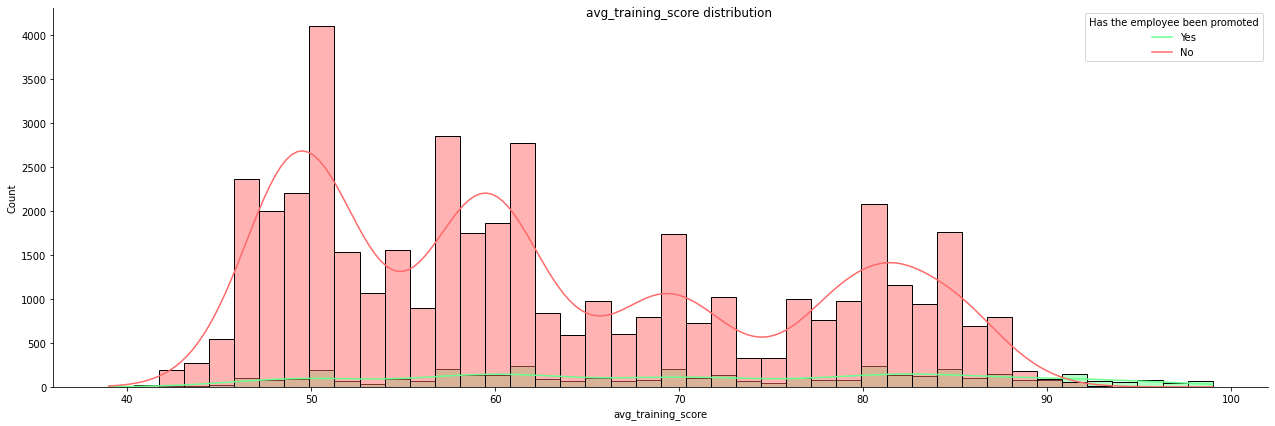

In [ ]:
custom_displot(df, 'avg_training_score')

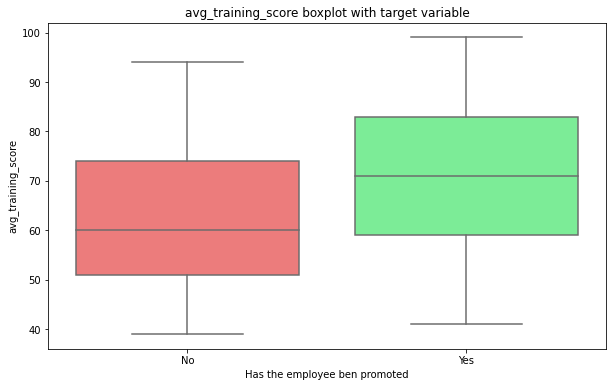

In [ ]:
custom_boxplot(df, 'avg_training_score')

Average training score seems like a good feature for us. When the value is more than 90, employees are gettin prompoted more often.

And from the boxplot we can see that the medians are different

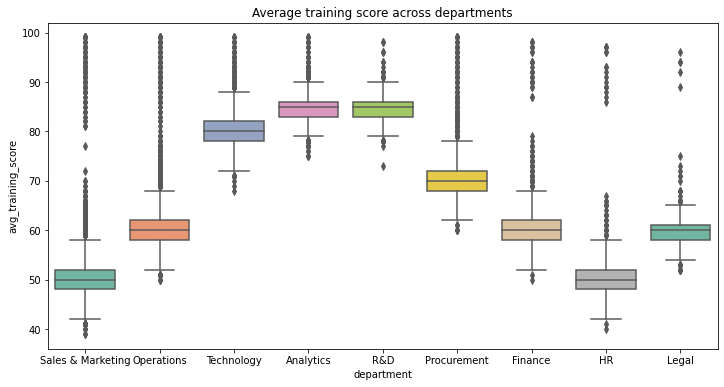

In [ ]:
plt.figure(figsize=(12,6))
graph = sns.boxplot(data=df, x='department', y='avg_training_score', palette=col1)
plt.title('Average training score across departments')
plt.show()

Average training score really differs across departments, so let's try to introduce new feature department_avg by dividing departments into groups.

In [ ]:
# Set buckets
high_avg_departments = ['Technology', 'Analytics', 'R&D'] # high average training score departments
mid_avg_departments = ['Operations', 'Finance', 'Procurement', 'Legal'] # medium average training score departments
low_avg_departments = ['Sales & Marketing', 'HR'] # low average training score departments

ml['department_avg'] = df['department']
ml['department_avg'].replace(high_avg_departments, 2, inplace=True)
ml['department_avg'].replace(mid_avg_departments, 1, inplace=True)
ml['department_avg'].replace(low_avg_departments, 0, inplace=True)

ml.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_avg
0,65438,0,7,2,1,0,1,35,5.0,8,1,0,49,0,0
1,65141,1,22,1,0,2,1,30,5.0,4,0,0,60,0,1
2,7513,0,19,1,0,0,1,34,3.0,7,0,0,50,0,0
3,2542,0,23,1,0,2,2,39,1.0,10,0,0,50,0,0
4,48945,2,26,1,0,2,1,45,3.0,2,0,0,73,0,2


### 2.5 Length of service

Does the company tend to promote employees with longer or shorter length of service? Is their selction biased?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


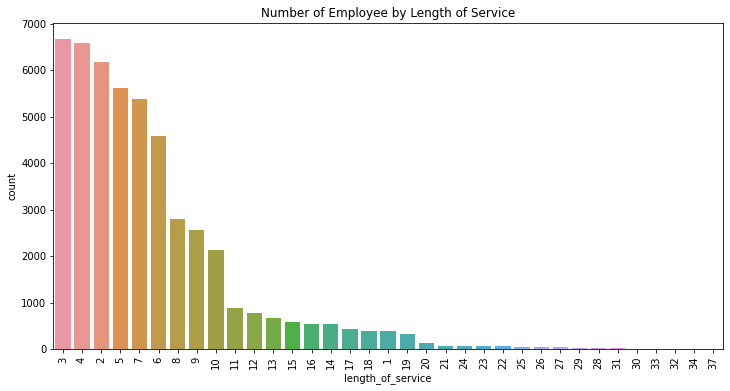

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Number of Employee by Length of Service')
ax = sns.countplot(df['length_of_service'], order = df['length_of_service'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

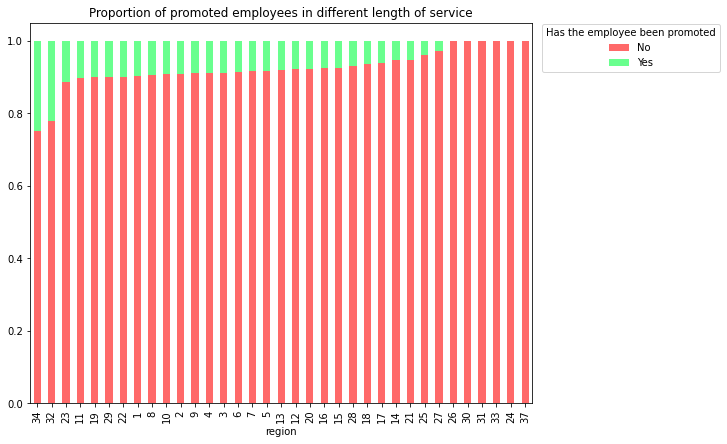

In [ ]:
data = pd.crosstab(df['length_of_service'], df['is_promoted'])
ax = data.div(data.sum(1).astype('float'), 
              axis = 0
             ).sort_values(by=0).plot(kind = 'bar', stacked = True, figsize = (9, 7), color=col2)

plt.title('Proportion of promoted employees in different length of service')
plt.xlabel('region')
plt.legend(title='Has the employee been promoted', bbox_to_anchor=(1.01, 1.01), labels=['No', 'Yes'])
plt.show()

From the promoted distribution against different length of service, we could tell that the promotion system is indeed biased. It leans significantly more weight to service length of 34 and 32. However, according to the countplot of all the lengths, those two length only have so few employees that even could be ignored. 

Although we do not know the clear reason for that, the promotion system is indeed inbalanced from this perspective.


# 3. Basic Machine Learning Model



In [ ]:
# Imports
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [ ]:
# Data Insights
ml.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_avg
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000,48660.000000
mean,39169.271681,2.248294,14.119400,1.294698,0.304316,1.131402,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971,0.910070
std,22630.461554,2.278968,10.038965,0.476109,0.460122,0.980710,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795,0.758471
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000,0.000000
25%,19563.500000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000,0.000000
50%,39154.000000,1.000000,13.000000,1.000000,0.000000,2.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000,1.000000
75%,58788.250000,4.000000,22.000000,2.000000,1.000000,2.000000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000,1.000000
max,78298.000000,8.000000,34.000000,2.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000,2.000000


In [ ]:
# Delet noisy column
ml.drop(columns = 'employee_id', inplace = True)

In [ ]:
# Test Train Split

from sklearn.model_selection import train_test_split
X = ml.drop(['is_promoted'], axis = 1)
y = ml['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 780 )

In [ ]:
# Check whether we did it right
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_avg
0,0,7,2,1,0,1,35,5.0,8,1,0,49,0
1,1,22,1,0,2,1,30,5.0,4,0,0,60,1
2,0,19,1,0,0,1,34,3.0,7,0,0,50,0
3,0,23,1,0,2,2,39,1.0,10,0,0,50,0
4,2,26,1,0,2,1,45,3.0,2,0,0,73,2


In [ ]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
Min_Max_Scaler = MinMaxScaler()

X_train = Min_Max_Scaler.fit_transform(X_train)
X_test = Min_Max_Scaler.fit_transform(X_test)

## 3.2 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_model)

0.9105356898205234

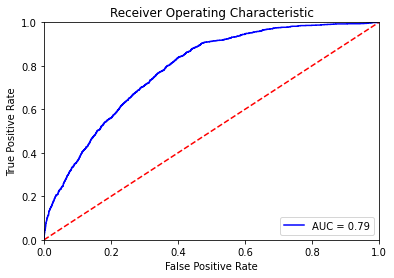

In [ ]:
# creating AUC/ROC graph (code from stackoverflow)
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3.2 XGBoost

In [ ]:
def auc_roc_graph(ytest,preds):# creating AUC/ROC graph
  ## Calculating metrics from ytest and predicted value
  fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
  roc_auc = metrics.auc(fpr, tpr)
  ## Plotting AUC-ROC
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
def train_and_predict(X_train_model, X_test_model, y_train_model, y_test_model, classifier):  ## Function takes in traintest split dataset and ML model - fits & predicts the model, calculates metrics
  ## Training the Model
  classifier.fit(X_train_model, y_train_model)

  ## Predicting the model
  y_model_tp = classifier.predict(X_test_model)

  ## Accuracy score
  a_score = metrics.accuracy_score(y_test_model, y_model_tp)
  print("The Accuracy is {}".format(a_score))

  ## Calculating sensitivity
  TP = sum((y_test_model == 1) & (y_model_tp == 1))
  p = sum((y_test_model == 1))
  TPR = TP/p
  print("The Sensitivity / True Positive Rate (TPR) is {}".format(TPR))

  ## Calculating Specifictiy
  N = sum(y_test_model == 0)
  TN = sum((y_test_model == 0) & (y_model_tp == 0))
  TNR = TN/N
  print("The Specifictiy / TNR  is {}".format(TNR))

  # calculate recall
  recall = metrics.recall_score(y_test_model, y_model_tp, average='binary')
  print('Recall: %.3f' % recall)

  # calculating precision
  precision = metrics.precision_score(y_test_model, y_model_tp, average='binary')
  print('Precision: {}'.format(precision))

  ## Calculating F1 score
  score = metrics.f1_score(y_test_model, y_model_tp, average='binary')
  print('F1-score: {}'.format(score))

  ##Printing the roc_auc
  auc_roc_graph(y_test_model,y_model_tp)

  return [a_score,TPR,TNR, recall, precision,score]

In [ ]:
## Instantiating the XGboost model

XgB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

The Accuracy is 0.9362241402931909
The Sensitivity / True Positive Rate (TPR) is 0.27890625
The Specifictiy / TNR  is 0.9993993092055864
Recall: 0.279
Precision: 0.9780821917808219
F1-score: 0.4340425531914894


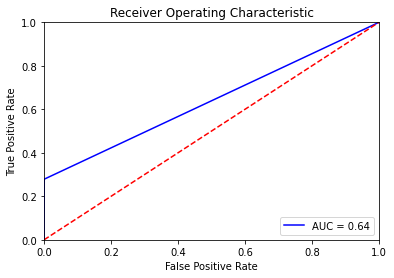

In [ ]:
xg_metrics = train_and_predict(X_train, X_test, y_train, y_test,XgB)

In [ ]:
y_pred = XgB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13318
           1       0.98      0.28      0.43      1280

    accuracy                           0.94     14598
   macro avg       0.96      0.64      0.70     14598
weighted avg       0.94      0.94      0.92     14598



In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_XgB = XgB.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_XgB))

0.8996573305394954


## 3.3 Random Forest

In [ ]:
# initiate the model 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

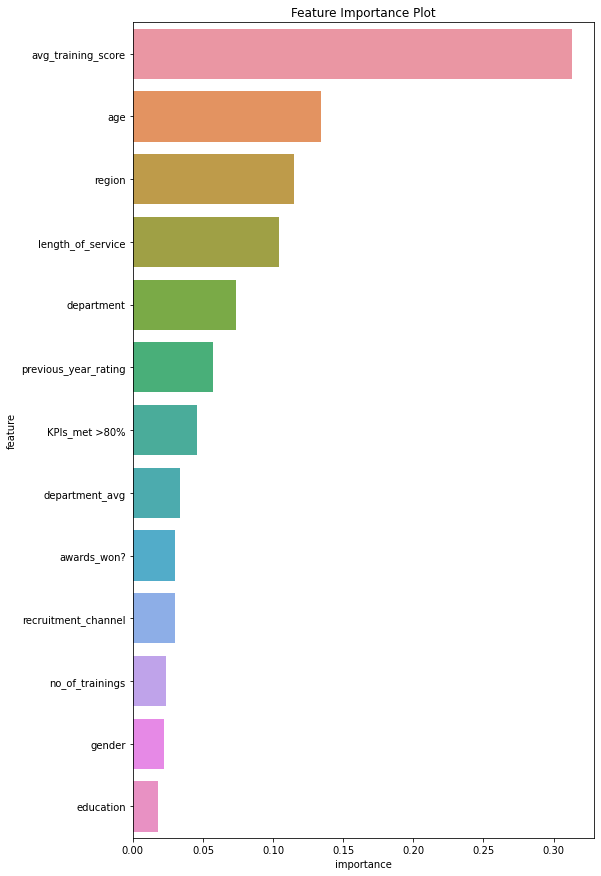

In [ ]:
# explore feature importance
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':rfc.feature_importances_}).sort_values('importance',ascending=False).reset_index().drop(columns='index')
fig, ax = plt.subplots()
fig.set_size_inches(8.27,15)
plt.title('Feature Importance Plot')
sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance[:50])

In [ ]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96     13318
           1       0.87      0.28      0.42      1280

    accuracy                           0.93     14598
   macro avg       0.90      0.64      0.69     14598
weighted avg       0.93      0.93      0.92     14598



In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_rfc = rfc.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_rfc))

0.8765951156329779


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("specificity", specificity, "sensitivity", sensitivity )

specificity 0.9960955098363118 sensitivity 0.28046875


0.8765951156329779


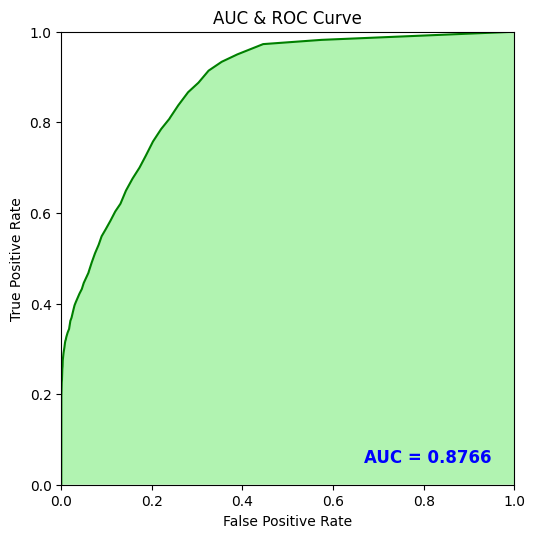

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_rfc)
print(auc)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_rfc)
#print(false_positive_rate,true_positive_rate)
plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## 3.4 Multilayer Perceptron Classifier

* Rationale: The most typical MLP includes three layers: an input layer, a hidden layer and an output layer. The different layers of the MLP neural network are fully connected (full connection means: any neuron in the upper layer and all the neurons in the next layer). Neurons are connected)

* ReLU is a relatively popular activation function recently. When the input signal is less than 0, the output is 0; when the input signal is greater than 0, the output is equal to the input; the specific activation function used depends on the specific situation.

In [ ]:
fit_MLP = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
fit_MLP.predict_proba(X_test[:1])

array([[0.7911987, 0.2088013]])

In [ ]:
fit_MLP.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
fit_MLP.score(X_test, y_test)

0.9373886833812851

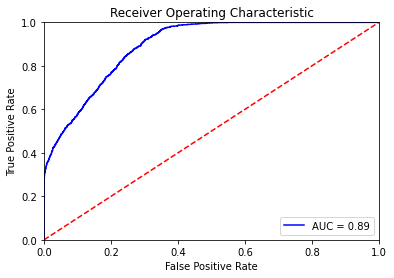

In [ ]:
# creating AUC/ROC graph
import sklearn.metrics as metrics
probs = fit_MLP.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We got multiple models based on different basis. And the brief conclusion should be as follows.

If we want to identify employees worthy of promotion as best as possible, we should 

* choose the Random Forest 
* or choose the MLP classifier


# 4. Deep Learning Application (Neural Networks) 



In [ ]:
# Imports
import tensorflow as tf
from tensorflow import keras
from google.colab import files
import pandas as pd
import io

In [ ]:
# Get data initially
ml.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_avg
0,0,7,2,1,0,1,35,5.0,8,1,0,49,0,0
1,1,22,1,0,2,1,30,5.0,4,0,0,60,0,1
2,0,19,1,0,0,1,34,3.0,7,0,0,50,0,0
3,0,23,1,0,2,2,39,1.0,10,0,0,50,0,0
4,2,26,1,0,2,1,45,3.0,2,0,0,73,0,2


In [ ]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt

def build_model():
    model = keras.Sequential([
        # This is essentially a dense layer that mimics word embedding; we are reducing the one-hot encoded text (10,000+ one-hot tokens) down to 750 latent dimensions.
        layers.Dense(750, activation="linear"),
        layers.Dense(50, activation="relu",kernel_regularizer="l2"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.01), loss="binary_crossentropy", metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)])
    return model

model = build_model()

data_train = X_train
labels_train = y_train
data_test = X_test
labels_test = y_test

k = 4
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 25
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

In [ ]:
# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_binary_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['binary_accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

Epoch 1/10
1022/1022 [==============================] - 5s 4ms/step - loss: 1.2287 - binary_accuracy: 0.9141 - val_loss: 1.0110 - val_binary_accuracy: 0.9111
Epoch 2/10
1022/1022 [==============================] - 4s 4ms/step - loss: 0.8908 - binary_accuracy: 0.9141 - val_loss: 0.7967 - val_binary_accuracy: 0.9111
Epoch 3/10
1022/1022 [==============================] - 4s 4ms/step - loss: 0.7129 - binary_accuracy: 0.9141 - val_loss: 0.6497 - val_binary_accuracy: 0.9111
Epoch 4/10
1022/1022 [==============================] - 5s 5ms/step - loss: 0.5898 - binary_accuracy: 0.9141 - val_loss: 0.5475 - val_binary_accuracy: 0.9111
Epoch 5/10
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5038 - binary_accuracy: 0.9141 - val_loss: 0.4756 - val_binary_accuracy: 0.9111
Epoch 6/10
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4436 - binary_accuracy: 0.9141 - val_loss: 0.4254 - val_binary_accuracy: 0.9111
Epoch 7/10
1022/1022 [==============================

In [ ]:
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

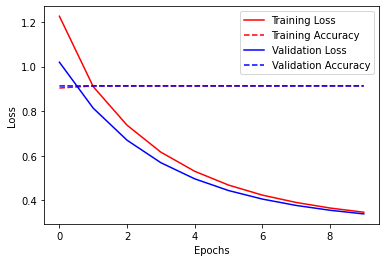

In [ ]:
# Plot validation performance. 
plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()